#Importação de dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Carregar os dados de cadastros (arquivo .xlsx)
cadastros = pd.read_excel("/content/DADOS_CADASTRO_UBS_EINSTEIN (1).xlsx")

# Carregar os dados de atendimentos (arquivo .xlsx)
atendimentos = pd.read_excel("/content/ATENDIMENTOS_2022 (1).xlsx")


In [ ]:
cadastros

,NUMERO_IDENTIFICACAO,DATA_NASCIMENTO,RACA_COR,SEXO_NASCIMENTO,AVC_DERRAME,CANCER,DIABETES,DIAGNOSTICO_SAUDE_MENTAL,DOENCA_RESPIRATORIA,HIPERTENSAO_ARTERIAL,ALGUMA_INTERNACAO,ALCOOL,DROGAS,FUMANTE,GESTANTE,PLANO_SAUDE,RECEBE_BENEFICIO,RESPONSAVEL_FAMILIAR
0,7114667,2022-06-29,PARDA,FEMININO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,NAO
1,7128864,1991-11-04,PRETA,FEMININO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NAO,NaN,NAO
2,9904817,2022-05-16,PRETA,MASCULINO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,NAO
3,2871981,2001-07-04,BRANCA,MASCULINO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO,NaN,NAO
4,3529561,1962-07-19,BRANCA,FEMININO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,SIM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15495,2909578,1979-03-22,BRANCA,FEMININO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,SIM
15496,2483245,1983-05-03,BRANCA,FEMININO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO
15497,4190654,1977-09-02,PARDA,FEMININO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,SIM,NaN,SIM
15498,8105205,1987-05-10,PRETA,FEMININO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NAO,NaN,NAO


#Limpeza de dados

Na etapa de limpeza de dados optei por usar a média para valores numéricos em branco e a moda para valores categóricos.

In [ ]:
cadastros.fillna(cadastros.mean(), inplace=True)  # Preencher valores numéricos com a média
cadastros.fillna(cadastros.mode().iloc[0], inplace=True)  # Preencher valores categóricos com a moda

<ipython-input-66-cf4f4a7fa40d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  cadastros.fillna(cadastros.mean(), inplace=True)  # Preencher valores numéricos com a média
<ipython-input-66-cf4f4a7fa40d>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  cadastros.fillna(cadastros.mean(), inplace=True)  # Preencher valores numéricos com a média
<ipython-input-66-cf4f4a7fa40d>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cadastros.fill

Para facilitar o manuseio removi letras minusculas e substitui possiveis espaços por underscore

In [ ]:
cadastros.columns = cadastros.columns.str.lower()  # Converter nomes de colunas para letras minúsculas
cadastros.columns = cadastros.columns.str.replace(' ', '_')  # Substituir espaços por underscores

#Exploração de dados

Conhecendo os nomes das colunas

In [ ]:
#conhacendo as colunas para começar o trabalho de análise
for col in cadastros.columns:
    print(col)

numero_identificacao
data_nascimento
raca_cor
sexo_nascimento
avc_derrame
cancer
diabetes
diagnostico_saude_mental
doenca_respiratoria
hipertensao_arterial
alguma_internacao
alcool
drogas
fumante
gestante
plano_saude
recebe_beneficio
responsavel_familiar


Tabelas de contagens de valores presentes nas colunas apresetadas

In [ ]:
# Criar uma tabela com os valores únicos e suas contagens para cada coluna
colunas = ['raca_cor','sexo_nascimento','avc_derrame', 'cancer', 'diabetes', 'diagnostico_saude_mental', 'doenca_respiratoria',
           'hipertensao_arterial', 'alguma_internacao', 'alcool', 'drogas', 'fumante', 'gestante',
           'plano_saude', 'recebe_beneficio', 'responsavel_familiar']

# Criar e exibir as tabelas para as colunas especificadas
for coluna in colunas:
    tabela_coluna = cadastros[coluna].value_counts()
    print(f"\nTabela de {coluna}:")
    print(tabela_coluna)




Tabela de raca_cor:
PARDA             8800
BRANCA            5485
PRETA             1101
AMARELA            110
SEM INFORMAÇÃO       3
INDÍGENA             1
Name: raca_cor, dtype: int64

Tabela de sexo_nascimento:
FEMININO     8483
MASCULINO    7017
Name: sexo_nascimento, dtype: int64

Tabela de avc_derrame:
NAO    15422
SIM       78
Name: avc_derrame, dtype: int64

Tabela de cancer:
NAO    15430
SIM       70
Name: cancer, dtype: int64

Tabela de diabetes:
NAO    14735
SIM      765
Name: diabetes, dtype: int64

Tabela de diagnostico_saude_mental:
NAO    15168
SIM      332
Name: diagnostico_saude_mental, dtype: int64

Tabela de doenca_respiratoria:
NAO    15251
SIM      249
Name: doenca_respiratoria, dtype: int64

Tabela de hipertensao_arterial:
NAO    13736
SIM     1764
Name: hipertensao_arterial, dtype: int64

Tabela de alguma_internacao:
NAO    15380
SIM      120
Name: alguma_internacao, dtype: int64

Tabela de alcool:
NAO    15046
SIM      454
Name: alcool, dtype: int64

Tabela de

Tabela com Habitos de Saúde

In [ ]:
from prettytable import PrettyTable

# Dados para a tabela de hábitos de saúde
dados_habitos = {
    'Hábitos de Saúde': ['Uso de drogas', 'Uso de alcool', 'Tabagismo'],
    'SIM': [0.9, 2.7, 5.2],
    'NAO': [99.0, 97.0, 94.7]
}

# Criar a tabela usando PrettyTable
tabela_habitos = PrettyTable()
tabela_habitos.field_names = ['Hábitos de Saúde', 'Respondeu sim', 'Respondeu não']

# Adicionar as linhas à tabela
for i in range(len(dados_habitos['Hábitos de Saúde'])):
    tabela_habitos.add_row([
        dados_habitos['Hábitos de Saúde'][i],
        f"{dados_habitos['SIM'][i]:.1f}%",
        f"{dados_habitos['NAO'][i]:.1f}%"
    ])

# Exibir a tabela de hábitos de saúde formatada
print("Tabela de Hábitos de Saúde")
print(tabela_habitos)


Tabela de Hábitos de Saúde
+------------------+---------------+---------------+
| Hábitos de Saúde | Respondeu sim | Respondeu não |
+------------------+---------------+---------------+
|  Uso de drogas   |      0.9%     |     99.0%     |
|  Uso de alcool   |      2.7%     |     97.0%     |
|    Tabagismo     |      5.2%     |     94.7%     |
+------------------+---------------+---------------+


Distribuição percentual de gênero

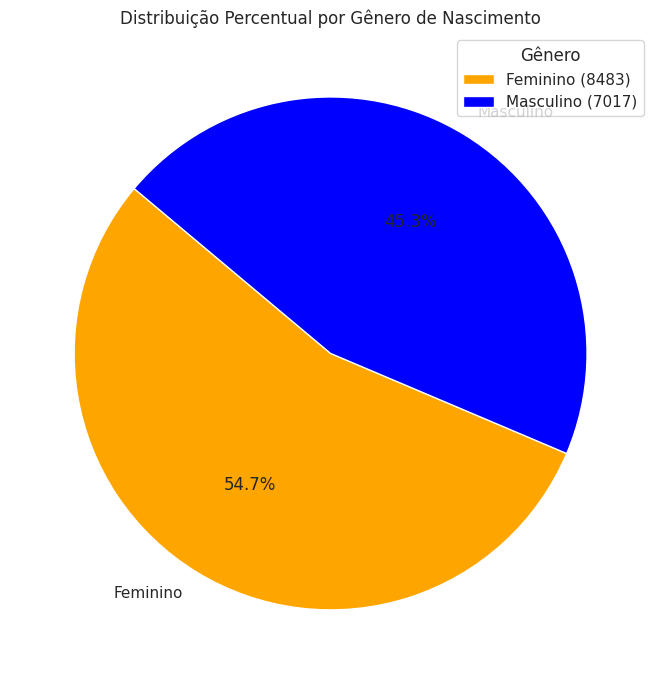

In [ ]:
# Dados
generos = ['Feminino', 'Masculino']
contagem = [8483, 7017]

# Calcular as porcentagens
total = sum(contagem)
porcentagens = [(count / total) * 100 for count in contagem]

# Cores para os gêneros
cores = ['orange', 'blue']

# Criar o gráfico de pizza
plt.figure(figsize=(8, 7))
plt.pie(porcentagens, labels=generos, colors=cores, autopct='%.1f%%', startangle=140)
plt.title("Distribuição Percentual por Gênero de Nascimento")

# Adicionar legenda
plt.legend(title="Gênero", loc="upper right", labels=[f'{genero} ({contagem})' for genero, contagem in zip(generos, contagem)])

# Ajustar o layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Dritribuição de faixa etária

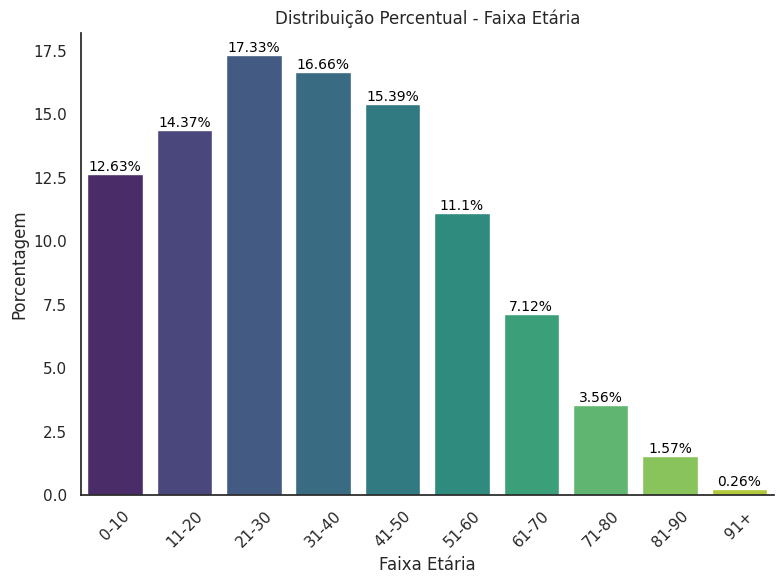

In [ ]:
# Calcular as idades a partir das datas de nascimento
cadastros['data_nascimento'] = pd.to_datetime(cadastros['data_nascimento'])
current_date = pd.to_datetime('2023-08-13')  # Data atual
cadastros['idade'] = (current_date - cadastros['data_nascimento']).dt.days // 365

# Categorizar as idades em intervalos de 10 anos
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
cadastros['faixa_etaria'] = pd.cut(cadastros['idade'], bins=bins, labels=labels, right=False)

# Calcular as porcentagens por faixa etária
porcentagens = (cadastros['faixa_etaria'].value_counts(normalize=True) * 100).round(2)

# Definir o estilo do gráfico sem as linhas de fundo
sns.set(style="white")

# Criar um gráfico de barras com porcentagens e rótulos para a coluna 'faixa_etaria'
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=porcentagens.index, y=porcentagens.values, palette="viridis")
plt.title("Distribuição Percentual - Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Porcentagem")
plt.xticks(rotation=45)

# Adicionar rótulos com as porcentagens acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Remover as bordas do gráfico
sns.despine()

plt.tight_layout()
plt.show()


Gráfico de distribuição da população masculina e feminina para criação de pirâmide etária no excel

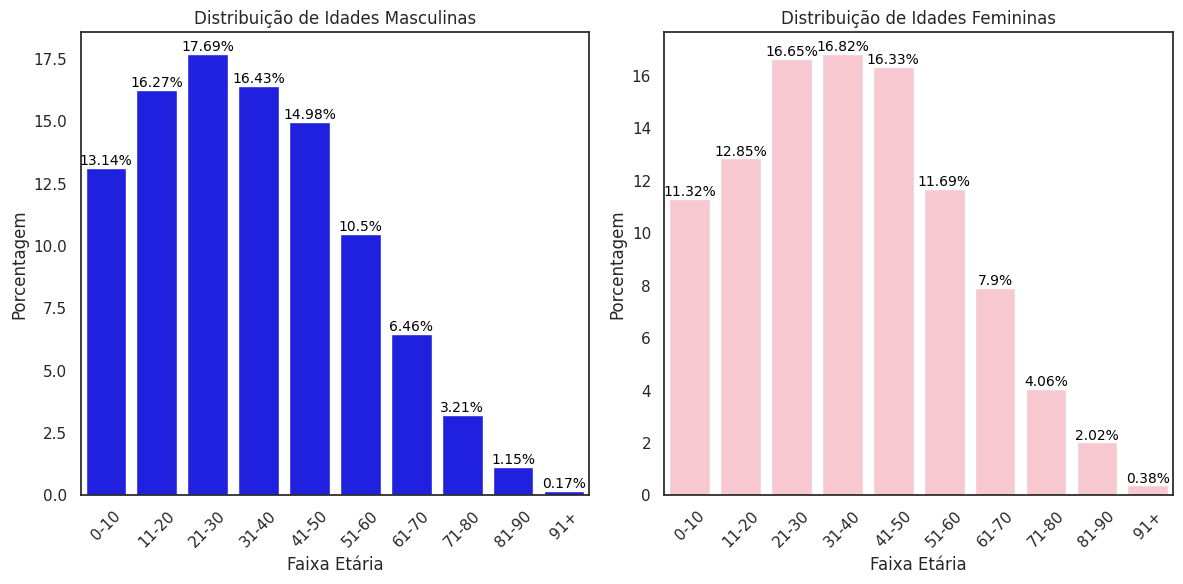

In [ ]:
# Calcular as idades a partir das datas de nascimento
cadastros['data_nascimento'] = pd.to_datetime(cadastros['data_nascimento'])
current_year = pd.to_datetime('2023-08-13').year  # Ano atual
cadastros['idade'] = current_year - cadastros['data_nascimento'].dt.year

# Categorizar as idades em intervalos de 10 anos
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
cadastros['faixa_etaria'] = pd.cut(cadastros['idade'], bins=bins, labels=labels, right=False)

# Separar os dados por sexo
male_data = cadastros[cadastros['sexo_nascimento'] == 'MASCULINO']
female_data = cadastros[cadastros['sexo_nascimento'] == 'FEMININO']

# Calcular a frequência de cada faixa etária por sexo
male_freq = (male_data['faixa_etaria'].value_counts(normalize=True) * 100).round(2)
female_freq = (female_data['faixa_etaria'].value_counts(normalize=True) * 100).round(2)

# Definir o estilo do gráfico sem as linhas de fundo
sns.set(style="white")

# Criar um subplot com dois gráficos de barras separados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de idades masculinas
ax1 = sns.barplot(x=male_freq.index, y=male_freq.values, ax=ax1, color='blue')
ax1.set_title("Distribuição de Idades Masculinas")
ax1.set_xlabel("Faixa Etária")
ax1.set_ylabel("Porcentagem")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Adicionar porcentagens nas barras
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Gráfico de idades femininas
ax2 = sns.barplot(x=female_freq.index, y=female_freq.values, ax=ax2, color='pink')
ax2.set_title("Distribuição de Idades Femininas")
ax2.set_xlabel("Faixa Etária")
ax2.set_ylabel("Porcentagem")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Adicionar porcentagens nas barras
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ajustar o layout
plt.tight_layout()

# Mostrar os gráficos
plt.show()


Tabela de distribuição da população masculina e feminina para criação de pirâmide etária no excel

In [ ]:
# Calcular as idades a partir das datas de nascimento
cadastros['data_nascimento'] = pd.to_datetime(cadastros['data_nascimento'])
current_year = pd.to_datetime('2023-08-13').year  # Ano atual
cadastros['idade'] = current_year - cadastros['data_nascimento'].dt.year

# Categorizar as idades em intervalos de 10 anos
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91+']
cadastros['faixa_etaria'] = pd.cut(cadastros['idade'], bins=bins, labels=labels, right=False)

# Separar os dados por sexo
male_data = cadastros[cadastros['sexo_nascimento'] == 'MASCULINO']
female_data = cadastros[cadastros['sexo_nascimento'] == 'FEMININO']

# Calcular a frequência de cada faixa etária por sexo
male_freq = (male_data['faixa_etaria'].value_counts(normalize=True) * 100).round(2).reindex(labels, fill_value=0)
female_freq = (female_data['faixa_etaria'].value_counts(normalize=True) * 100).round(2).reindex(labels, fill_value=0)

# Criar um DataFrame para a tabela
table_data = {'Faixa Etária': labels, 'Masculino (%)': male_freq.values, 'Feminino (%)': female_freq.values}
table_df = pd.DataFrame(table_data)

# Exibir a tabela
print(table_df)

table_df.to_excel('tabela_distribuicao.xlsx', index=False)


  Faixa Etária  Masculino (%)  Feminino (%)
0         0-10          13.14         11.32
1        11-20          16.27         12.85
2        21-30          17.69         16.65
3        31-40          16.43         16.82
4        41-50          14.98         16.33
5        51-60          10.50         11.69
6        61-70           6.46          7.90
7        71-80           3.21          4.06
8        81-90           1.15          2.02
9          91+           0.17          0.38


#Gestantes

In [ ]:
# Lista das colunas para verificar
colunas_verificar = [
    'sexo_nascimento','avc_derrame', 'cancer', 'diabetes', 'diagnostico_saude_mental',
    'doenca_respiratoria', 'hipertensao_arterial', 'alguma_internacao',
    'alcool', 'drogas', 'fumante', 'gestante', 'plano_saude',
    'recebe_beneficio'
]

# Contar quantas gestantes responderam "SIM" para cada coluna
for coluna in colunas_verificar:
    total_gestantes_sim = len(cadastros[(cadastros['gestante'] == 'SIM') & (cadastros[coluna] == 'SIM')])
    print(f"Total de gestantes que responderam SIM para a coluna {coluna}: {total_gestantes_sim}")


Total de gestantes que responderam SIM para a coluna sexo_nascimento: 0
Total de gestantes que responderam SIM para a coluna avc_derrame: 0
Total de gestantes que responderam SIM para a coluna cancer: 0
Total de gestantes que responderam SIM para a coluna diabetes: 2
Total de gestantes que responderam SIM para a coluna diagnostico_saude_mental: 0
Total de gestantes que responderam SIM para a coluna doenca_respiratoria: 5
Total de gestantes que responderam SIM para a coluna hipertensao_arterial: 2
Total de gestantes que responderam SIM para a coluna alguma_internacao: 1
Total de gestantes que responderam SIM para a coluna alcool: 6
Total de gestantes que responderam SIM para a coluna drogas: 1
Total de gestantes que responderam SIM para a coluna fumante: 7
Total de gestantes que responderam SIM para a coluna gestante: 108
Total de gestantes que responderam SIM para a coluna plano_saude: 10
Total de gestantes que responderam SIM para a coluna recebe_beneficio: 0


Quantidade de gestantes

In [ ]:
# Contar quantas pessoas disseram "SIM" para serem gestantes
total_gestantes = len(cadastros[cadastros['gestante'] == 'SIM'])

print(f"Total de pessoas que disseram SIM para serem gestantes: {total_gestantes}")

Total de pessoas que disseram SIM para serem gestantes: 108


Idade média das gestantes

In [ ]:
# Calcular a idade das gestantes na data do registro
hoje = pd.to_datetime('today')
cadastros['idade_na_data'] = (hoje - cadastros['data_nascimento']).astype('<m8[Y]')

# Analisar a média de idade das gestantes e não gestantes
media_idade_gestantes = cadastros[cadastros['gestante'] == 'SIM']['idade_na_data'].mean()
media_idade_nao_gestantes = cadastros[cadastros['gestante'] == 'NÃO']['idade_na_data'].mean()

print(f"Média de idade das gestantes: {media_idade_gestantes:.1f} anos")

Média de idade das gestantes: 28.6 anos


Gestante com plano de saúde

In [ ]:
# Calcular a idade das gestantes na data do registro
hoje = pd.to_datetime('today')
cadastros['idade_na_data'] = (hoje - cadastros['data_nascimento']).astype('<m8[Y]')

# Verificar se as gestantes têm plano de saúde
gestantes_com_plano = cadastros[(cadastros['gestante'] == 'SIM') & (cadastros['plano_saude'] == 'SIM')]
gestantes_sem_plano = cadastros[(cadastros['gestante'] == 'SIM') & (cadastros['plano_saude'] == 'NAO')]

print(f"Total de gestantes com plano de saúde: {len(gestantes_com_plano)}")
print(f"Total de gestantes sem plano de saúde: {len(gestantes_sem_plano)}")

Total de gestantes com plano de saúde: 10
Total de gestantes sem plano de saúde: 98


#Distribuição percentual de AVC Derrame

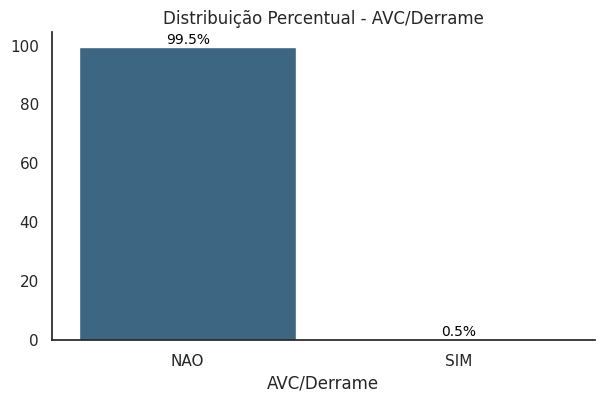

In [ ]:
#Estilo do gráfico sem as linhas de fundo
sns.set(style="white")

# Calcular as porcentagens
porcentagens = (cadastros['avc_derrame'].value_counts(normalize=True) * 100).round(2)

# Criar um gráfico de barras com porcentagens e rótulos para a coluna 'avc_derrame'
plt.figure(figsize=(7, 4))
ax = sns.barplot(x=porcentagens.index, y=porcentagens.values, palette="viridis")
plt.title("Distribuição Percentual - AVC/Derrame")
plt.xlabel("AVC/Derrame")
plt.ylabel("")
plt.xticks(rotation=0)

# Adicionar rótulos com as porcentagens em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Remover as bordas do gráfico
sns.despine()

plt.show()


#Prevalência

In [ ]:
# Lista das colunas de doenças
colunas_doencas = ['avc_derrame', 'cancer', 'diabetes', 'diagnostico_saude_mental', 'doenca_respiratoria', 'hipertensao_arterial']

# Casos por doença
casos_por_doenca = [78, 70, 765, 332, 249, 1764]

# População de estudo
populacao = 15500

# Calcular a prevalência por mil habitantes
prevalencias_por_mil = [(casos / populacao) * 100 for casos in casos_por_doenca]

# Criar DataFrame com os resultados
resultados = pd.DataFrame({
    'Doença': colunas_doencas,
    'Prevalência por 1000 habitantes': prevalencias_por_mil
})

# Exibir a tabela de resultados
print(resultados)

resultados.to_excel('prevalencia_por_mil.xlsx', index=False)


                     Doença  Prevalência por 1000 habitantes
0               avc_derrame                         0.503226
1                    cancer                         0.451613
2                  diabetes                         4.935484
3  diagnostico_saude_mental                         2.141935
4       doenca_respiratoria                         1.606452
5      hipertensao_arterial                        11.380645


#Box Plot Hipertensão Arterial

<ipython-input-81-d2f17fd07b3a>:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  cadastros['idade'] = (pd.to_datetime('now') - cadastros['data_nascimento']).astype('<m8[Y]')


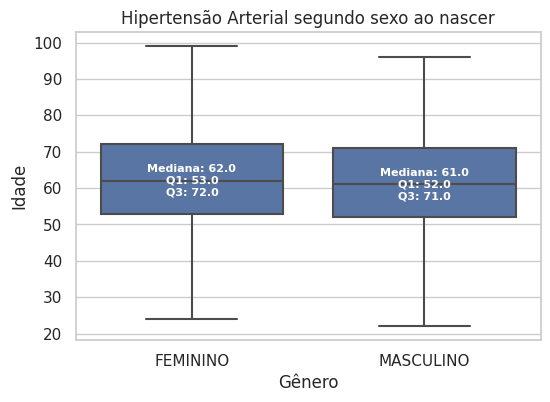

In [ ]:
# Calcular a idade a partir da data de nascimento
cadastros['data_nascimento'] = pd.to_datetime(cadastros['data_nascimento'])
cadastros['idade'] = (pd.to_datetime('now') - cadastros['data_nascimento']).astype('<m8[Y]')

# Mapear os valores da coluna 'hipertensao_arterial' para 'SIM' e 'NÃO'
cadastros['hipertensao_arterial'] = cadastros['hipertensao_arterial'].map({'SIM': 'SIM', 'NÃO': 'SIM'})

# Configurações estéticas do Seaborn
sns.set(style="whitegrid")

# Criar o box plot
plt.figure(figsize=(6, 4))
ax = sns.boxplot(x=cadastros['sexo_nascimento'], y=cadastros['idade'], hue=cadastros['hipertensao_arterial'], whis=[0, 100])
plt.title("Hipertensão Arterial segundo sexo ao nascer")
plt.xlabel("Gênero")
plt.ylabel("Idade")
plt.xticks(rotation=0)

# Adicionar os valores dos quartis no gráfico
medians = cadastros.groupby(['sexo_nascimento', 'hipertensao_arterial'])['idade'].median()
q1s = cadastros.groupby(['sexo_nascimento', 'hipertensao_arterial'])['idade'].quantile(0.25)
q3s = cadastros.groupby(['sexo_nascimento', 'hipertensao_arterial'])['idade'].quantile(0.75)

for i, (q1, median, q3) in enumerate(zip(q1s, medians, q3s)):
    ax.text(i, median, f'Mediana: {median:.1f}\nQ1: {q1:.1f}\nQ3: {q3:.1f}',
            ha='center', va='center', fontweight='bold', color='white', fontsize=8)  # Altere o valor de fontsize aqui

ax.get_legend().remove()  # Remove a legenda
plt.show()


<ipython-input-82-af846c889f18>:6: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  cadastros['idade'] = (pd.to_datetime('now') - cadastros['data_nascimento']).astype('<m8[Y]')


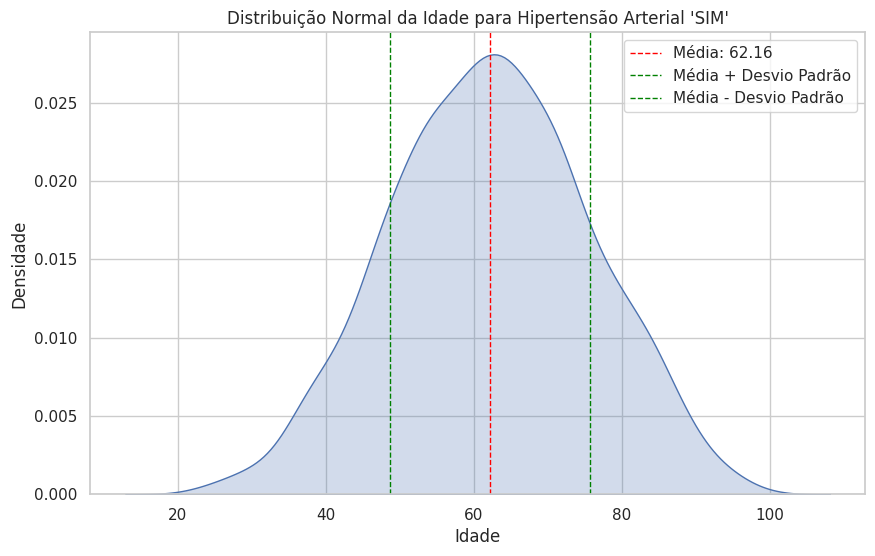

In [ ]:
# Configurações estéticas do Seaborn
sns.set(style="whitegrid")

# Calcular a idade a partir da data de nascimento
cadastros['data_nascimento'] = pd.to_datetime(cadastros['data_nascimento'])
cadastros['idade'] = (pd.to_datetime('now') - cadastros['data_nascimento']).astype('<m8[Y]')

# Filtrar os dados para hipertensão arterial 'SIM'
dados_hipertensao_sim = cadastros[cadastros['hipertensao_arterial'] == 'SIM']

# Criar o gráfico de distribuição normal
plt.figure(figsize=(10, 6))
sns.kdeplot(data=dados_hipertensao_sim, x='idade', fill=True)  # Supondo que a idade é a estatística que você quer analisar
plt.title("Distribuição Normal da Idade para Hipertensão Arterial 'SIM'")
plt.xlabel("Idade")
plt.ylabel("Densidade")

# Calcular média e desvio padrão
media = dados_hipertensao_sim['idade'].mean()
desvio_padrao = dados_hipertensao_sim['idade'].std()

# Adicionar informações no gráfico
plt.axvline(media, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media:.2f}')
plt.axvline(media + desvio_padrao, color='green', linestyle='dashed', linewidth=1, label=f'Média + Desvio Padrão')
plt.axvline(media - desvio_padrao, color='green', linestyle='dashed', linewidth=1, label=f'Média - Desvio Padrão')
plt.legend()

plt.show()


#Correlação

In [ ]:
# @title Texto de título padrão
from scipy.stats import chi2_contingency

# Lista das colunas de doenças
colunas_doencas = ['avc_derrame', 'cancer', 'diabetes', 'diagnostico_saude_mental', 'doenca_respiratoria', 'hipertensao_arterial']

# Variáveis para análise
variaveis_analise = ['raca_cor', 'sexo_nascimento']

# Loop para realizar a análise
associations = []
for variavel in variaveis_analise:
    for doenca in colunas_doencas:
        contingency_table = pd.crosstab(cadastros[variavel], cadastros[doenca])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        associations.append((variavel, doenca, chi2, p))

# Exibir resultados das associações
for variavel, doenca, chi2, p in associations:
    print(f"Associação de {doenca} com {variavel}:")
    print(f"Chi-square: {chi2:.2f}")
    print(f"P-value: {p:.4f}")
    if p < 0.05:
        print("Há associação significativa")
    else:
        print("Não há associação significativa")
    print("=" * 30)


Associação de avc_derrame com raca_cor:
Chi-square: 18.25
P-value: 0.0026
Há associação significativa
Associação de cancer com raca_cor:
Chi-square: 3.12
P-value: 0.6820
Não há associação significativa
Associação de diabetes com raca_cor:
Chi-square: 28.17
P-value: 0.0000
Há associação significativa
Associação de diagnostico_saude_mental com raca_cor:
Chi-square: 38.29
P-value: 0.0000
Há associação significativa
Associação de doenca_respiratoria com raca_cor:
Chi-square: 8.27
P-value: 0.1421
Não há associação significativa
Associação de hipertensao_arterial com raca_cor:
Chi-square: 0.00
P-value: 1.0000
Não há associação significativa
Associação de avc_derrame com sexo_nascimento:
Chi-square: 0.00
P-value: 1.0000
Não há associação significativa
Associação de cancer com sexo_nascimento:
Chi-square: 19.16
P-value: 0.0000
Há associação significativa
Associação de diabetes com sexo_nascimento:
Chi-square: 27.06
P-value: 0.0000
Há associação significativa
Associação de diagnostico_saude_men

#Tabelas de morbidades dicriminando por sexo ao nascer e raça-cor

Tabela de morbidades sexo ao nascer

In [ ]:
# Lista das colunas de doenças
colunas_doencas = ['avc_derrame', 'cancer', 'diabetes', 'diagnostico_saude_mental', 'doenca_respiratoria', 'hipertensao_arterial']

# Inicializar um dicionário para armazenar os resultados
resultados = {}

# Loop para calcular as quantidades de pessoas por gênero com cada doença
for doenca in colunas_doencas:
    contagem_por_genero = cadastros.groupby('sexo_nascimento')[doenca].apply(lambda x: (x == 'SIM').sum())
    resultados[doenca] = contagem_por_genero

# Criar um DataFrame a partir do dicionário de resultados
resultados_df = pd.DataFrame(resultados)

# Exibir a tabela de resultados
print(resultados_df)


                 avc_derrame  cancer  diabetes  diagnostico_saude_mental  \
sexo_nascimento                                                            
FEMININO                  43      57       489                       213   
MASCULINO                 35      13       276                       119   

                 doenca_respiratoria  hipertensao_arterial  
sexo_nascimento                                             
FEMININO                         148                  1159  
MASCULINO                        101                   605  


Tabela de morbidades segundo raça-cor

In [ ]:
# Lista das colunas de doenças
colunas_doencas = ['avc_derrame', 'cancer', 'diabetes', 'diagnostico_saude_mental', 'doenca_respiratoria', 'hipertensao_arterial']

# Inicializar um dicionário para armazenar os resultados
resultados = {}

# Loop para calcular as quantidades de pessoas por gênero com cada doença
for doenca in colunas_doencas:
    contagem_por_genero = cadastros.groupby('raca_cor')[doenca].apply(lambda x: (x == 'SIM').sum())
    resultados[doenca] = contagem_por_genero

# Criar um DataFrame a partir do dicionário de resultados
resultados_df = pd.DataFrame(resultados)

# Exibir a tabela de resultados
print(resultados_df)

                avc_derrame  cancer  diabetes  diagnostico_saude_mental  \
raca_cor                                                                  
AMARELA                   2       1         9                         0   
BRANCA                   25      29       320                       165   
INDÍGENA                  0       0         0                         0   
PARDA                    37      38       366                       137   
PRETA                    14       2        70                        30   
SEM INFORMAÇÃO            0       0         0                         0   

                doenca_respiratoria  hipertensao_arterial  
raca_cor                                                   
AMARELA                           0                    29  
BRANCA                          104                   687  
INDÍGENA                          0                     0  
PARDA                           123                   852  
PRETA                            22    

#Atendimentos

In [ ]:
# Analisar a coluna CATEGORIA_PROFISSIONAL
contagem_categoria = atendimentos['CATEGORIA_PROFISSIONAL'].value_counts()
print("Contagem de Categorias Profissionais:")
print(contagem_categoria)

# Analisar a coluna ANO_ATENDIMENTO
media_ano = atendimentos['ANO_ATENDIMENTO'].mean()
print("\nMédia dos Anos de Atendimento:", media_ano)

# Analisar a coluna MES_ATENDIMENTO
contagem_mes = atendimentos['MES_ATENDIMENTO'].value_counts()
print("\nContagem de Atendimentos por Mês:")
print(contagem_mes)

# Analisar a coluna DESCRICAO_PROCEDIMENTO_REALIZADO
procedimentos_unicos = atendimentos['DESCRICAO_PROCEDIMENTO_REALIZADO'].unique()
quantidade_procedimentos = len(procedimentos_unicos)
print("\nQuantidade de Procedimentos Únicos Realizados:", quantidade_procedimentos)

Contagem de Categorias Profissionais:
Medico Da Estrategia De Saude Da Familia                     27365
Enfermeiro Da Estrategia De Saude Da Familia                 23380
Cirurgiao-Dentista Da Estrategia De Saude Da Familia         15279
Auxiliar De Enfermagem Da Estrategia De Saude Da Familia      8854
Médico Residente                                               892
Farmacêutico                                                   808
Tecnico Em Saude Bucal Da Estrategia De Saude Da Familia       780
Nutricionista                                                  754
Enfermeiro                                                     542
Auxiliar Em Saude Bucal Da Estrategia De Saude Da Familia      529
Medico Psiquiatra                                              425
Medico Clinico                                                 376
Psicólogos E Psicanalistas                                     286
Fonoaudiólogo                                                  233
Fisioterapeuta          

In [ ]:
caminho_saida = "caminho_de_saida.csv"  # Substitua pelo caminho desejado
cadastros.to_csv(caminho_saida, index=False)

print("DataFrame exportado com sucesso!")

DataFrame exportado com sucesso!
